<a href="https://colab.research.google.com/github/Aakash0505/CAPSTONE_1/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

#Exploratory Data Analysis of churn dataset
Exploratory Data Analysis (EDA) is an approach to analyse data. The first and foremost task that the data analysts does is to view the data and tries to make some sense out of it. Later we figure out what questions we want to ask and how to use the available data to get the answers we need.

EDA helps us to: 1) Delve into the data set 2)Examine the relationships among the variables 3)Identify any interesting observation 4) Develop an initial idea of possible associations among the predictors and the target variable.

The telecom market in the US is saturated and customer growth rates are low. They key focus of market players therefore is on retention and churn control. This project explores the churn dataset to identify the key drivers of churn and grab key insights from the dataset.

Exploratory Data Analysis of churn dataset
Exploratory Data Analysis (EDA) is an approach to analyse data. The first and foremost task that the data analysts does is to view the data and tries to make some sense out of it. Later we figure out what questions we want to ask and how to use the available data to get the answers we need.

EDA helps us to: 1) Delve into the data set 2)Examine the relationships among the variables 3)Identify any interesting observation 4) Develop an initial idea of possible associations among the predictors and the target variable.

The telecom market in the US is saturated and customer growth rates are low. They key focus of market players therefore is on retention and churn control. This project explores the churn dataset to identify the key drivers of churn and grab key insights from the dataset.

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data=pd.read_csv("/content/drive/MyDrive/Telecom Churn .csv")

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


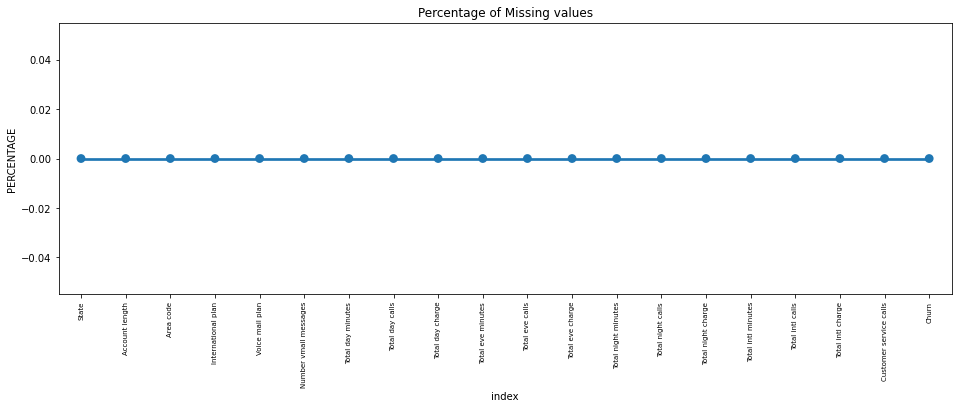

In [27]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

since there are no null values in any of the columns of our data. 
we don't have to do any data cleaning. 

Missing Data – Initial Intuition
Here, we don’t have any missing data.

General Thumb Rules:

When we see a lot of outliers in the dataset then don’t really use mean
because if the dataset has lots of outliers then we would be in the situation where the regression analysis will have drastic changes.
And if we get features that have a high number of missing values then it’s better to drop them.
As there’s no thumb rule on what criteria do we delete the columns with a high number of missing values, still one can delete the columns, if you have more than 30-40% of missing values.

In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


# important points




*   mean account_lenght of data is 101 and 25% having more than 127
*   mean of customer service calls is very less i.e. 1
*   on comparing the day,even and night call we can say that the charges at the day are high and eve are medium and night call charges are very low
* international call charges are very high as compared to day,eve and night.







In [29]:
data.shape

(3333, 20)

In [30]:
data.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In column name we space(" ") so we replace it with underscore("_")
because In data cleaning part spaces will show error

In [31]:
data.columns = ['State', 'Account_length', 'Area_code', 'International_plan',
       'Voice_mail_plan', 'Number_vmail_messages', 'Total_day_minutes',
       'Total_day_calls', 'Total_day_charge', 'Total_eve_minutes',
       'Total_eve_calls', 'Total_eve_charge', 'Total_night_minutes',
       'Total_night_calls', 'Total_night_charge', 'Total_intl_minutes',
       'Total_intl_calls', 'Total_intl_charge', 'Customer_service_calls',
       'Churn']

In [32]:
data.dtypes

State                      object
Account_length              int64
Area_code                   int64
International_plan         object
Voice_mail_plan            object
Number_vmail_messages       int64
Total_day_minutes         float64
Total_day_calls             int64
Total_day_charge          float64
Total_eve_minutes         float64
Total_eve_calls             int64
Total_eve_charge          float64
Total_night_minutes       float64
Total_night_calls           int64
Total_night_charge        float64
Total_intl_minutes        float64
Total_intl_calls            int64
Total_intl_charge         float64
Customer_service_calls      int64
Churn                        bool
dtype: object

Text(0.5, 1.02, 'Count of TARGET Variable per category')

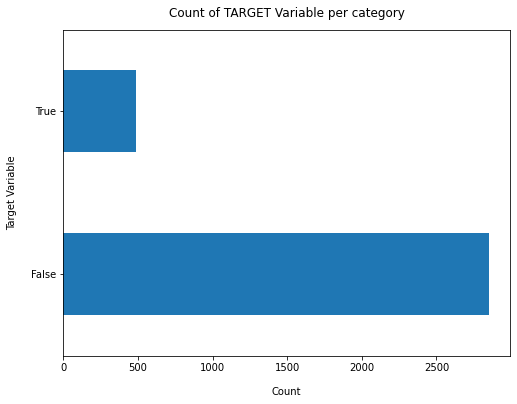

In [33]:
data['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02)

let's see the percentage of our target variable


In [34]:
100*data['Churn'].value_counts()/len(data['Churn'])

False    85.508551
True     14.491449
Name: Churn, dtype: float64

Let’s see the value count of our target variable

In [35]:
data["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [36]:
data1=data.copy()

In [37]:
data1.Total_day_charge = pd.to_numeric(data1.Total_day_charge, errors='coerce')
data1.isnull().sum()

State                     0
Account_length            0
Area_code                 0
International_plan        0
Voice_mail_plan           0
Number_vmail_messages     0
Total_day_minutes         0
Total_day_calls           0
Total_day_charge          0
Total_eve_minutes         0
Total_eve_calls           0
Total_eve_charge          0
Total_night_minutes       0
Total_night_calls         0
Total_night_charge        0
Total_intl_minutes        0
Total_intl_calls          0
Total_intl_charge         0
Customer_service_calls    0
Churn                     0
dtype: int64

In [39]:
# Descriptive Analysis of object and boolean type data
data1.describe(include=['object', 'bool'])

,State,International_plan,Voice_mail_plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


In [41]:
# Correlation Plot 
corr=data1.corr()
corr.style.background_gradient().set_precision(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Account_length,Area_code,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
Account_length,1.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
Area_code,-0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
Number_vmail_messages,-0.0,-0.0,1.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.1
Total_day_minutes,0.0,-0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2
Total_day_calls,0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0
Total_day_charge,0.0,-0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.2
Total_eve_minutes,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
Total_eve_calls,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
Total_eve_charge,-0.0,0.0,0.0,0.0,-0.0,0.0,1.0,-0.0,1.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.1
Total_night_minutes,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


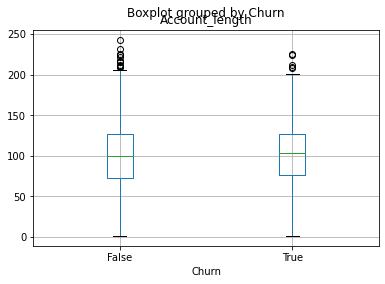

In [46]:
# Box Plot for Account Length attribute 
data1.boxplot(column='Account_length',by='Churn')

The mean of Account length is almost similar to for both churn groups.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


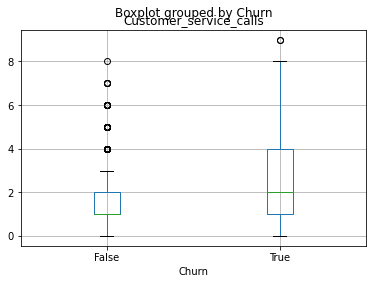

In [48]:
# Box Plot for CustServ Calls attribute 
data1.boxplot(column='Customer_service_calls',by='Churn')

There is a considerable amount of difference in mean of Customer service calls for both the churn groups.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


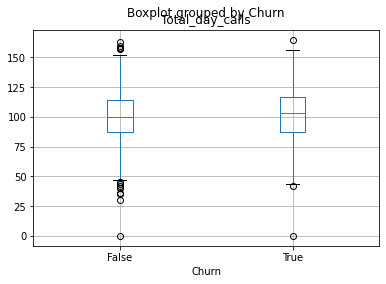

In [50]:
data1.boxplot(column='Total_day_calls',by='Churn')

The Day Min mean is different for both the churn group.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


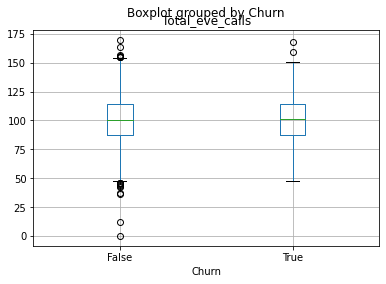

In [51]:
data1.boxplot(column='Total_eve_calls',by='Churn')

There is a slight amount of difference in mean of Evening mins for both the churn groups. The Box plot also show us the outliers and range of each variable.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


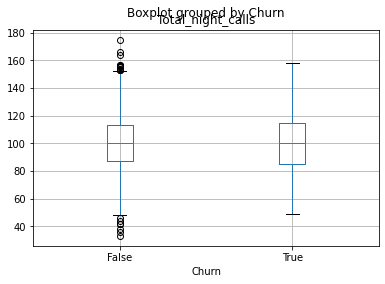

In [52]:
data1.boxplot(column='Total_night_calls',by='Churn')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3bd1d5c90>,
      dtype=object)

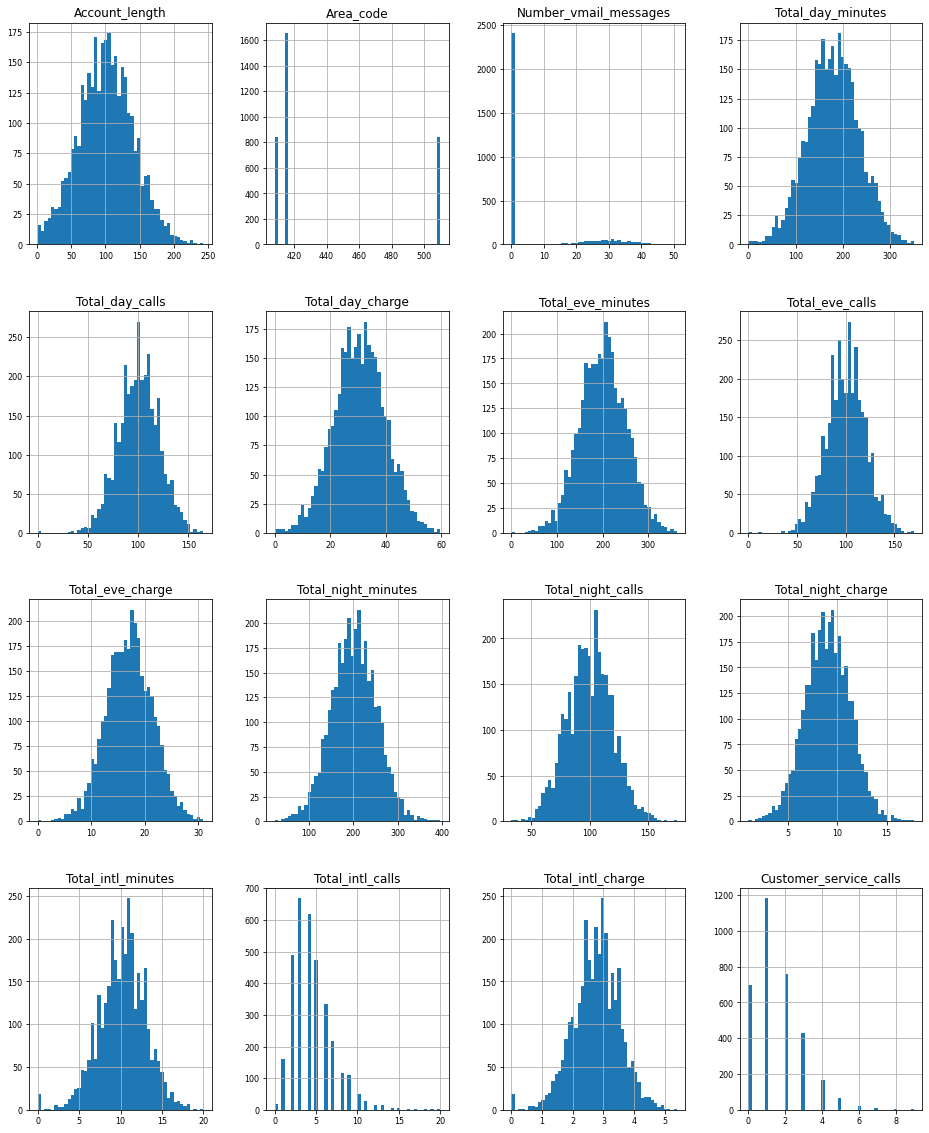

In [53]:
# Histogram for each variable
data1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

The charge and min variable have similar distribution as they are perfectly correlated.

In [61]:
# International Plan 
pd.crosstab(data1['Churn'], data1["International_plan"], margins=True)

International_plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


Let’s see how churn rate is related to the International plan variable. We see that, with International Plan, the churn rate is much higher. Clearly, those who have selected the International Plan have a greater chance of leaving the company’s service than do those who do not have the International Plan. Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator’s customers.

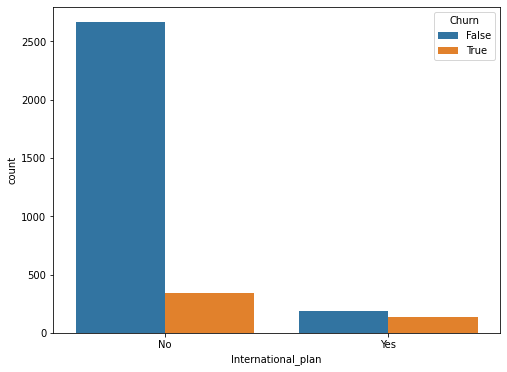

In [62]:
# Histogram of International Plan grouped by churn
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="International_plan", hue='Churn', data=data1);


In [63]:
# Customer Service Calls 
pd.crosstab(data1['Churn'], data1["Customer_service_calls"], margins=True)

Customer_service_calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


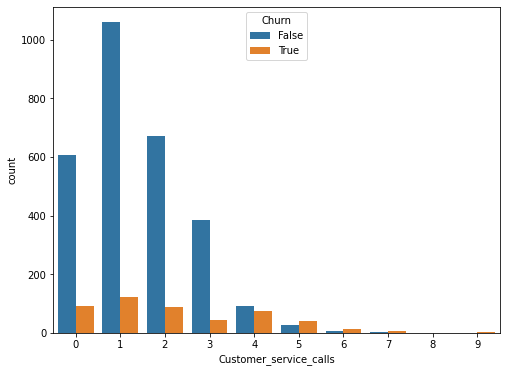

In [64]:
# Histogram of Customer Serice calls grouped by churn  
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Customer_service_calls", hue='Churn', data=data1);

The picture clearly states that the churn rate strongly increases starting from 4 calls to the service center. Customers who have called customer service three or fewer times have a markedly lower churn rate than that of customers who have called customer service four or more times.

In [65]:
pd.crosstab(data1['Churn'], data1["Total_day_minutes"], margins=True)

Total_day_minutes,0.0,2.6,7.8,7.9,12.5,17.6,18.9,19.5,25.9,27.0,...,328.1,329.8,332.9,334.3,335.5,337.4,345.3,346.8,350.8,All
Churn,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2850
True,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,483
All,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,3333


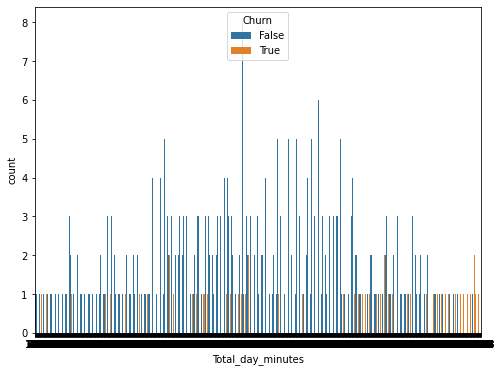

In [66]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.countplot(x="Total_day_minutes", hue='Churn', data=data1);

The customers with high day mins have higher churn rate. Same goes for the customers with high Evening mins.

# INSIGHTS
Let us consider some of the insights we have gained into the churn data set through the use of exploratory data analysis.


*   The four charge fields are linear functions of the minute fields.
*   The area code field and/or the state field are anomalous, and can be omitted.
The correlations among the remaining predictor variables are weak, allowing us to retain them all for any data mining model.

Insights with respect to churn:



*   Customers with the International Plan tend to churn more frequently.
*   Customers with four or more customer service calls churn more than four times as often as do the other customers.
* Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.
There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

